In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as Math
from libsvm.svmutil import *
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

# Exercise 1: A spam filter using SVM
## Part A: Build a spam filter using a pre-processed dataset

### This function converts data to libsvm format

In [2]:
def libsvmformat(data,name):
    row=''
    for i in range(0,len(data)):
        row=row+str(data.iloc[i][data.shape[1]-1])
        for j in range(0,data.shape[1]-1):
            if data.iloc[i][j]!=0:
                row=row+" "+str(j)+":"+str(data.iloc[i][j])
        row=row+'\n'
    file=open(r'E:\Documents\University of Hildesheim\Machine learning lab\lab9/'+name,'w')
    file.write(row)
    file.close()

### Splitting the data into train and test

In [3]:
def splitdata(x,val):
    splt=np.random.rand(len(x))< val
    return x[splt],x[~splt]

In [4]:
d3=pd.read_csv(r'E:\Documents\University of Hildesheim\Machine learning lab\lab9\spambase.data',sep=',',header=None)
train,test = splitdata(d3,0.8)
libsvmformat(train,'train.txt')
libsvmformat(test,'test.txt')

### svm_read_problem reads LIBSVM-format data from data_file and return labels y and data instances x.

In [5]:
ytrain,xtrain=svm_read_problem(r'E:\Documents\University of Hildesheim\Machine learning lab\lab9\train.txt')
ytest,xtest=svm_read_problem(r'E:\Documents\University of Hildesheim\Machine learning lab\lab9\test.txt')

### Training the model and finding the best accuracy as well as best parameter which is c

In [6]:
c=np.arange(0.1,100,5)
bestmse=None
mse=[]
accuracy=None
accuracylist=[]
optimum_c=None
for parameter in c:
    model=svm_train(ytrain,xtrain,'-c ' + str(parameter))
    label,acc,val=svm_predict(ytest,xtest,model)
    if(len(mse)==0 or acc[1]<bestmse):
        optimum_c=parameter
        bestmse=acc[1]
        accuracy=acc[0]
    accuracylist.append(acc[0])
    mse.append(acc[1])
print('The best c is :',optimum_c)
print('The best mse is :',bestmse)
print('The best accuracy is :',accuracy)

Accuracy = 76.3797% (692/906) (classification)
Accuracy = 86.4238% (783/906) (classification)
Accuracy = 86.2031% (781/906) (classification)
Accuracy = 86.5342% (784/906) (classification)
Accuracy = 86.4238% (783/906) (classification)
Accuracy = 86.6446% (785/906) (classification)
Accuracy = 86.6446% (785/906) (classification)
Accuracy = 86.5342% (784/906) (classification)
Accuracy = 86.5342% (784/906) (classification)
Accuracy = 86.3135% (782/906) (classification)
Accuracy = 86.3135% (782/906) (classification)
Accuracy = 86.3135% (782/906) (classification)
Accuracy = 86.2031% (781/906) (classification)
Accuracy = 86.2031% (781/906) (classification)
Accuracy = 86.2031% (781/906) (classification)
Accuracy = 86.3135% (782/906) (classification)
Accuracy = 86.3135% (782/906) (classification)
Accuracy = 86.2031% (781/906) (classification)
Accuracy = 86.2031% (781/906) (classification)
Accuracy = 86.2031% (781/906) (classification)
The best c is : 25.1
The best mse is : 0.1335540838852097
Th

### After analyzing the graph we can see that with the increase of value of c the accuracy increases but remained constant after c>60

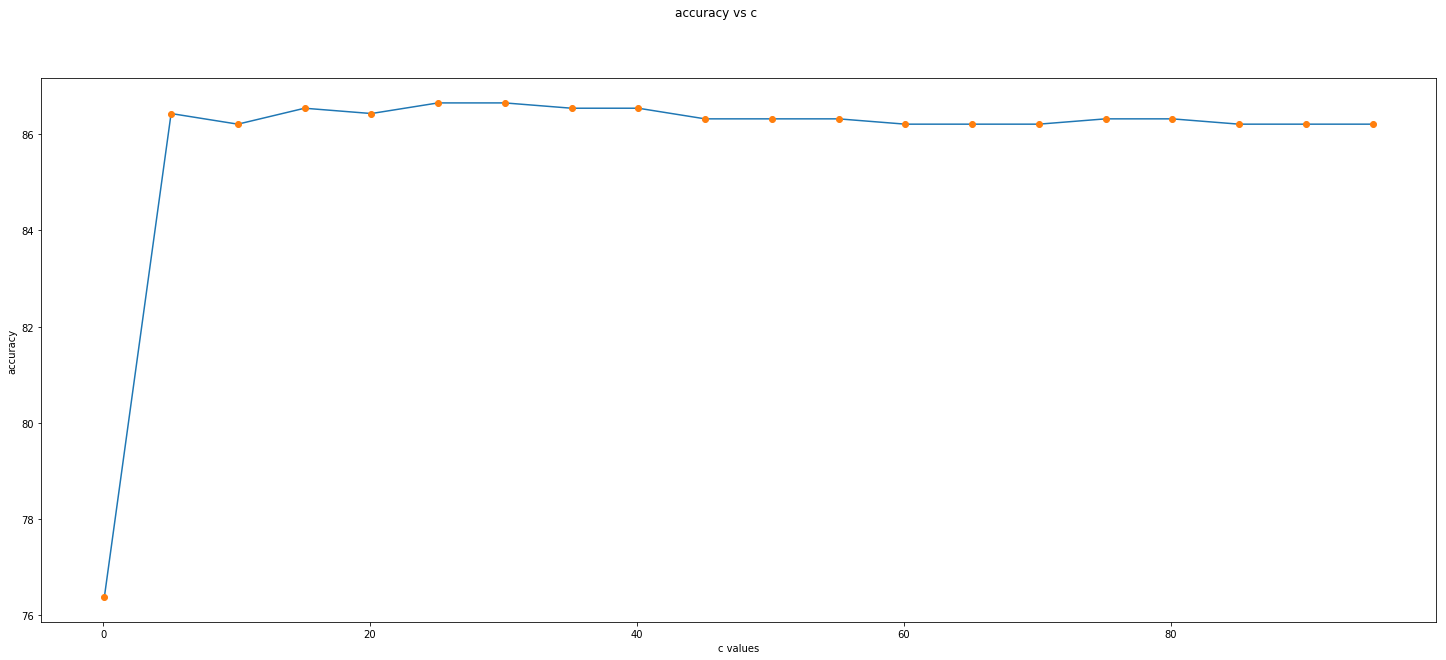

In [7]:
fig,axs=plt.subplots(1,1 ,figsize=(25,10))
fig.suptitle('accuracy vs c')
axs.plot(c,accuracylist)
axs.plot(c,accuracylist,'o')
axs.set_xlabel('c values')
axs.set_ylabel('accuracy')
plt.show()

### After analyzing the graph we can see that with the increase of value of c the error decreases but remained constant after c>60

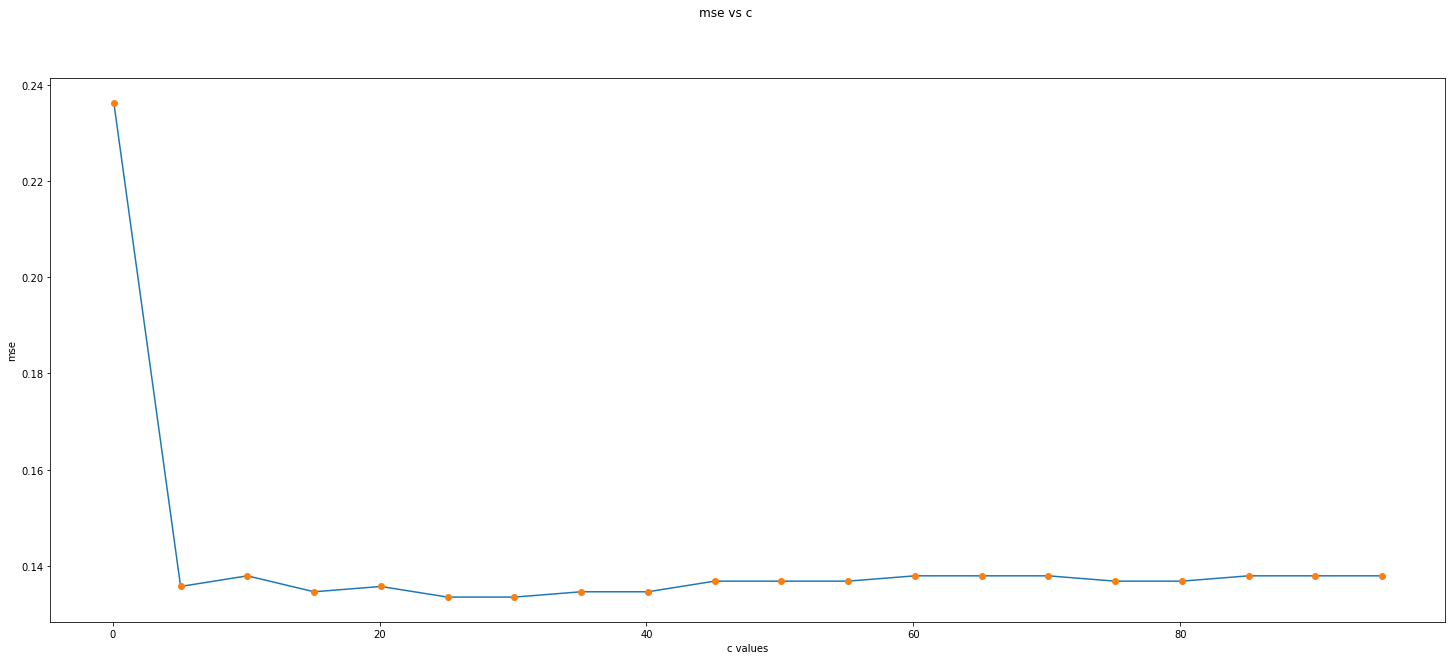

In [8]:
fig,axs=plt.subplots(1,1 ,figsize=(25,10))
fig.suptitle('mse vs c')
axs.plot(c,mse)
axs.plot(c,mse,'o')
axs.set_xlabel('c values')
axs.set_ylabel('mse')
plt.show()

## Part B: Pre-processed a dataset and learn SVM

In [9]:
d2=pd.read_csv(r'E:\Documents\University of Hildesheim\Machine learning lab\lab9\SMSSpamCollection.txt',sep="\t",header=None)

### Converting ham and spam into 1 and 0

In [10]:
d2[0]=d2[0].replace(['ham','spam'],[1,0])

### Extracting features using the TfidfVevtorizer and getting rid of stop words

In [11]:
vectorizer=TfidfVectorizer(stop_words='english')
x=vectorizer.fit_transform(d2[1].values)

In [12]:
x_train, x_test, y_train, y_test =train_test_split(x.toarray(), 
                                                  d2[0].values,train_size=0.7, 
                                                  test_size=0.3, 
                                                  random_state=0,shuffle=True)

### Parameters of c are 1,20,40,100 and kernels are rbd and linear
### Using 5 fold cross validation

In [13]:
parameters={'C':[1,20,40,100],'kernel':['rbf','linear']}
svc = svm.SVC(gamma='auto')
gsearch=GridSearchCV(svc,cv=5,param_grid=parameters,verbose=1,refit=True)
gsearch.fit(x_train,y_train)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 47.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 20, 40, 100], 'kernel': ['rbf', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [14]:
print("Best value of c =",gsearch.best_params_['C'])

Best value of c = 1


In [15]:
gsearch.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [16]:
rbf=np.where(gsearch.cv_results_['param_kernel'].data == 'rbf')
linear=np.where(gsearch.cv_results_['param_kernel'].data == 'linear')

In [17]:
mean_test_score_rbf=[]
rbf_c=[]
mean_test_score_linear=[]
linear_c=[]
for i in range (0,len(rbf[0])):
    mean_test_score_rbf.append(gsearch.cv_results_['mean_test_score'][rbf[0][i]])
    rbf_c.append(gsearch.cv_results_['param_C'].data[rbf[0][i]])
for j in range (0,len(linear[0])):
    mean_test_score_linear.append(gsearch.cv_results_['mean_test_score'][linear[0][j]])
    linear_c.append(gsearch.cv_results_['param_C'].data[rbf[0][j]])

### After analyzing the graph we can see that mean test score is constant with the change of value of c where the kernel is RBF

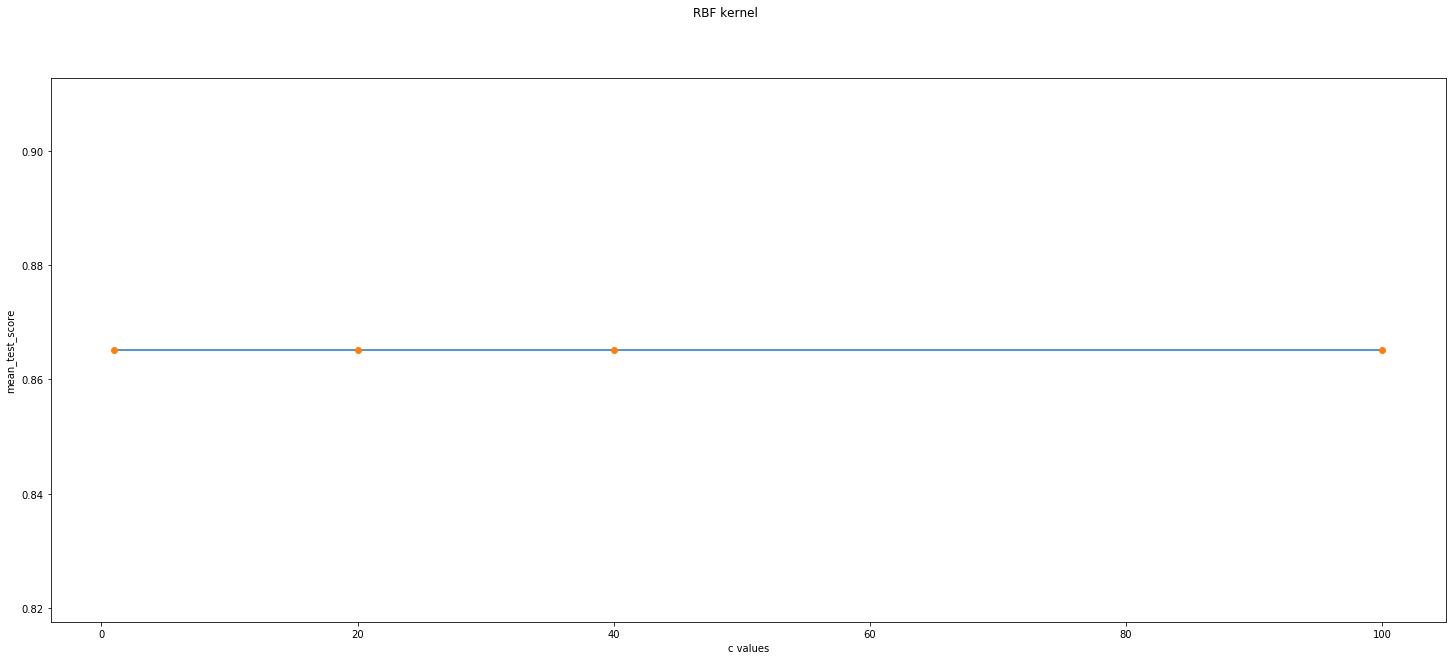

In [18]:
fig,axs=plt.subplots(1,1 ,figsize=(25,10))
fig.suptitle('RBF kernel')
axs.plot(rbf_c,mean_test_score_rbf)
axs.plot(rbf_c,mean_test_score_rbf,'o')
axs.set_xlabel('c values')
axs.set_ylabel('mean_test_score')
plt.show()

### After analyzing the graph we can see that with the when the value of c reached 20 after that the mean test score started to decrease and became constant

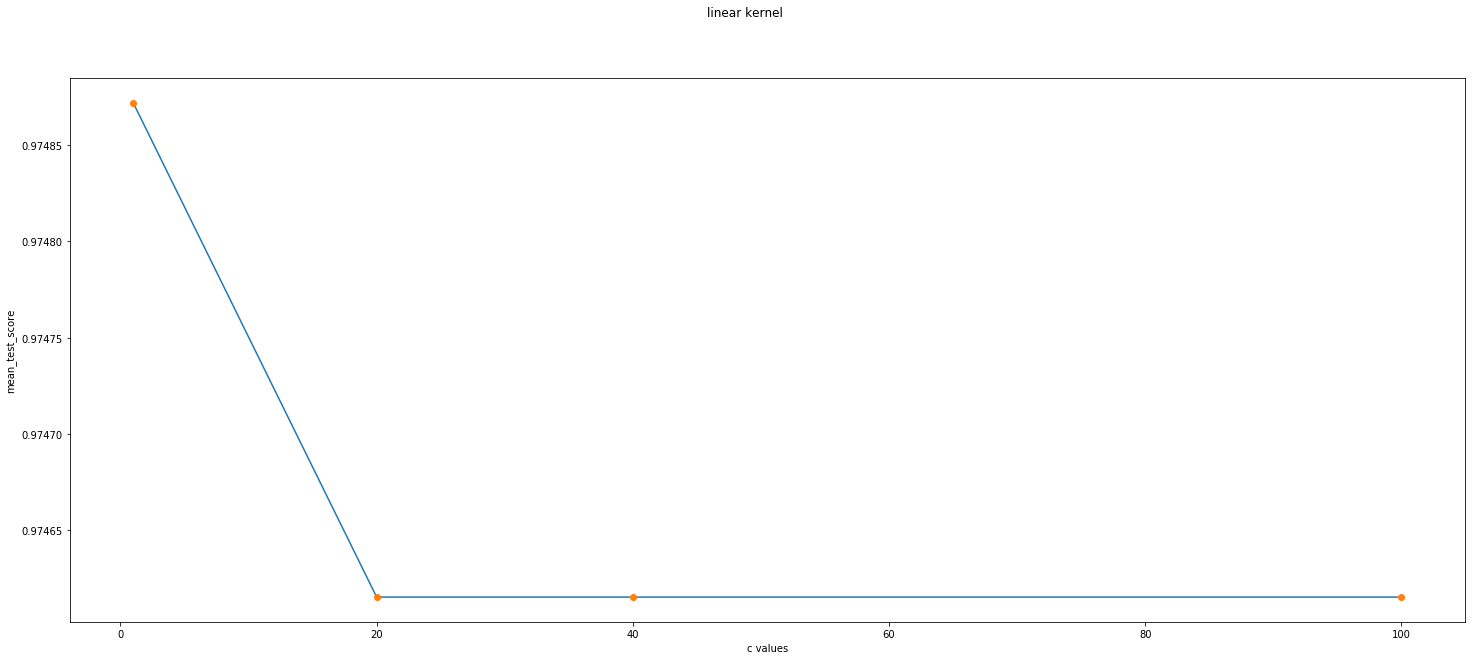

In [19]:
fig,axs=plt.subplots(1,1 ,figsize=(25,10))
fig.suptitle('linear kernel')
axs.plot(linear_c,mean_test_score_linear)
axs.plot(linear_c,mean_test_score_linear,'o')
axs.set_xlabel('c values')
axs.set_ylabel('mean_test_score')
plt.show()

# Exercise 2: Compare SVM based spam filter with another model

### Implementing decisiontree classifier and using the parameter max depth with a range from 10 to 20

In [20]:
parameters={'max_depth':list(range(10,20))}
model=DecisionTreeClassifier()
gsearchtree=GridSearchCV(model,parameters,cv=5)
gsearchtree.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
print("Best Depth value =",gsearchtree.best_params_['max_depth'])

Best Depth value = 19


In [22]:
gsearchtree.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

### After analyzing the graph we can see that SVM gives more accuracy than Decision tree classifier because mean test score is lower in this graph than in SVM graph

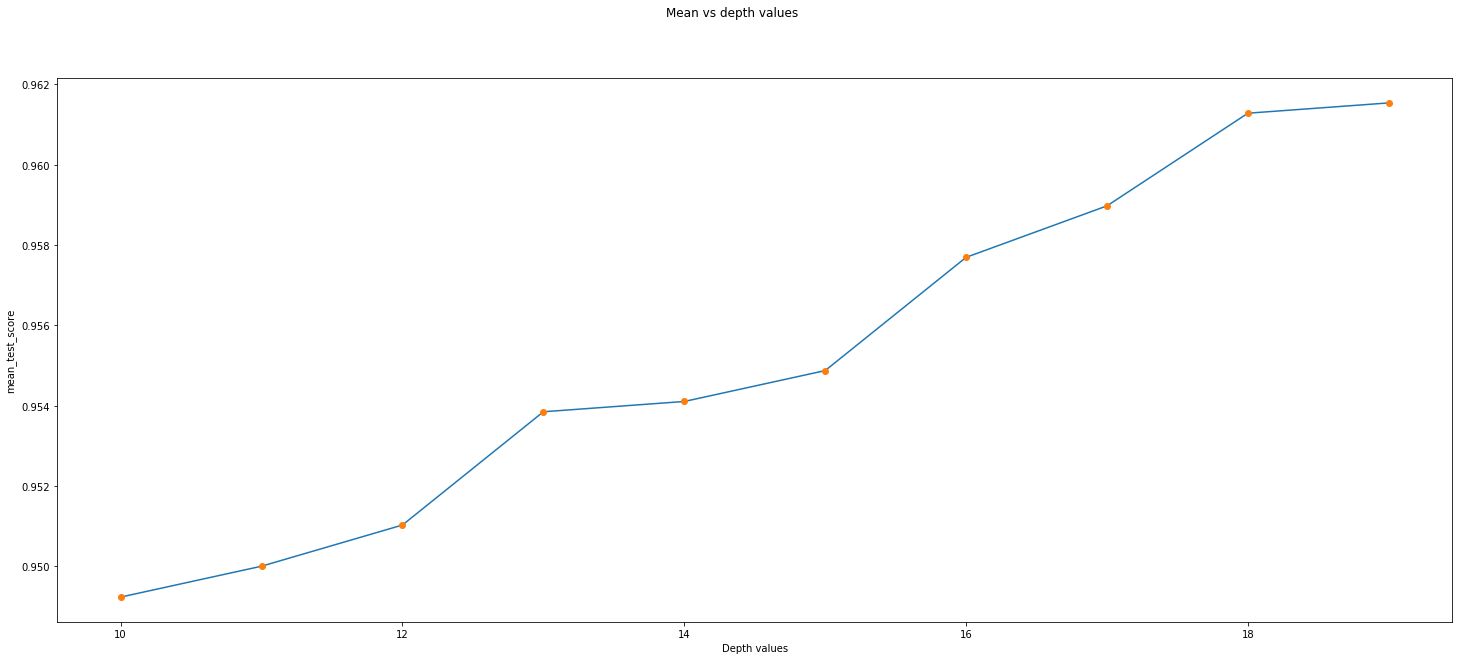

In [23]:
fig,axs=plt.subplots(1,1 ,figsize=(25,10))
fig.suptitle('Mean vs depth values')
axs.plot(gsearchtree.cv_results_['param_max_depth'].data,gsearchtree.cv_results_['mean_test_score'])
axs.plot(gsearchtree.cv_results_['param_max_depth'].data,gsearchtree.cv_results_['mean_test_score'],'o')
axs.set_xlabel('Depth values')
axs.set_ylabel('mean_test_score')
plt.show()